In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/wine.csv'

In [4]:
df_pre = pd.read_csv(filename)
df = df_pre.sample(frac=0.15) # 전체 데이터의 몇 % 사용할지를 

In [5]:
print(df.head(5))

      7.4   0.7     0  1.9  0.076     11  ...   0.9978  3.51  0.56   9.4  5  1
3934  6.8  0.26  0.22  4.8  0.041  110.0  ...  0.99437  3.29  0.67  10.6  5  0
1356  7.3  0.43  0.24  2.5  0.078   27.0  ...  0.99648  3.60  0.59  11.1  6  1
6472  5.6  0.20  0.36  2.5  0.048   16.0  ...  0.99282  3.49  0.49  10.0  6  0
4082  6.4  0.30  0.16  7.5  0.050   55.0  ...  0.99590  3.17  0.49   9.0  5  0
2409  6.0  0.41  0.05  1.5  0.063   17.0  ...  0.99320  3.21  0.56   9.2  6  0

[5 rows x 13 columns]


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 3934 to 2207
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     974 non-null    float64
 1   0.7     974 non-null    float64
 2   0       974 non-null    float64
 3   1.9     974 non-null    float64
 4   0.076   974 non-null    float64
 5   11      974 non-null    float64
 6   34      974 non-null    float64
 7   0.9978  974 non-null    float64
 8   3.51    974 non-null    float64
 9   0.56    974 non-null    float64
 10  9.4     974 non-null    float64
 11  5       974 non-null    int64  
 12  1       974 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.5 KB
None


In [7]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 모델 업데이트하기 - 에포크마다 저장
import os
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

In [11]:
modelpath = '/content/drive/My Drive/Colab Notebooks/model/{epoch:02d}-{val_loss:4f}.hdf5'

In [12]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only=True)

In [13]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
history = model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
2/2 [==============================] - 1s 189ms/step - loss: 2.9085 - accuracy: 0.0668 - val_loss: 2.0989 - val_accuracy: 0.0718
Epoch 2/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.9251 - accuracy: 0.0873 - val_loss: 1.2619 - val_accuracy: 0.1026
Epoch 3/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.1385 - accuracy: 0.1990 - val_loss: 0.8053 - val_accuracy: 0.6462
Epoch 4/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.7368 - accuracy: 0.6662 - val_loss: 0.6237 - val_accuracy: 0.7385
Epoch 5/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.5742 - accuracy: 0.7677 - val_loss: 0.5522 - val_accuracy: 0.7538
Epoch 6/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.5054 - accuracy: 0.7792 - val_loss: 0.5220 - val_accuracy: 0.7538
Epoch 7/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.4744 - accuracy: 0.7792 - val_loss: 0.5028 - val_accuracy: 0.7538
Epoch 8/2000

In [15]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


31/31 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9979

 Accuracy: 0.9979


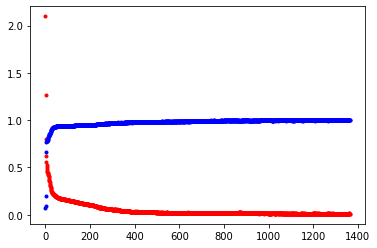

In [16]:
import numpy
import matplotlib.pyplot as plt

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()